# **Lesson_4.1**

## In this lecture

* Fork repository, update or recreate codespace

* Pandas: data handling (introduction and essentials)
* In-class exercise

---

## Pandas Series and DataFrame*

<p align="center">
	<img src="../assets/img/pandas_series_dataframe.jpg" width="700">
</p>

#### In Data Science, Pandas handles data in Series and DataFrames.

* A Pandas Series is similar to a NumPy array: A grid of values that contain data (numerical, categorical, date, boolean etc.)
* A key difference is that a Series can be indexed by a label, either number or category.

#### There are multiple ways to create a **Pandas Series**

You can create a Pandas Series using `pd.Series()` based on a Python list. The argument is dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
categories = ['a', 'b', 'c']
my_list = [11, 22, 33]

In [4]:
ser = pd.Series(data = my_list, index = categories)
ser

a    11
b    22
c    33
dtype: int64

#### Pandas **DataFrame**

**DataFrames** are the basis of Pandas.

* A dataframe is a set of Series put together to share the same index.
* Think of DataFrames as an Excel, or data table in JavaScript
* Typically the nomenclature for a Pandas DataFrame is **df**
* To create a DataFrame, use `pd.DataFrame()`. Consider the DataFrame below created based on the following arguments:
	* data are an array.
	* index is a list A to E
	* columns a list Col1 to Col4


In [5]:
np.random.seed(42)
df = pd.DataFrame(data=np.random.randn(5,4),
                  index=['A', 'B', 'C', 'D', 'E'],
                  columns=['Col1', 'Col2', 'Col3', 'Col4']
                  )

In [6]:
df

,Col1,Col2,Col3,Col4
A,0.496714,-0.138264,0.647689,1.523030
B,-0.234153,-0.234137,1.579213,0.767435
C,-0.469474,0.542560,-0.463418,-0.465730
D,0.241962,-1.913280,-1.724918,-0.562288
E,-1.012831,0.314247,-0.908024,-1.412304


### How to Filter, Add and Drop DataFrame Columns

In [7]:
df['Col1']

A    0.496714
B   -0.234153
C   -0.469474
D    0.241962
E   -1.012831
Name: Col1, dtype: float64

In [8]:
df[['Col1', 'Col2']]
     

,Col1,Col2
A,0.496714,-0.138264
B,-0.234153,-0.234137
C,-0.469474,0.542560
D,0.241962,-1.913280
E,-1.012831,0.314247


In [9]:
df.filter(['Col1'])

,Col1
A,0.496714
B,-0.234153
C,-0.469474
D,0.241962
E,-1.012831


In [10]:
df1 = df.copy()

In [11]:
df1

,Col1,Col2,Col3,Col4
A,0.496714,-0.138264,0.647689,1.523030
B,-0.234153,-0.234137,1.579213,0.767435
C,-0.469474,0.542560,-0.463418,-0.465730
D,0.241962,-1.913280,-1.724918,-0.562288
E,-1.012831,0.314247,-0.908024,-1.412304


In [32]:
df1['Col5'] = df['Col1']

KeyError: 'Col1'

In [31]:
df1

,Col1,Col2,Col3,Col4,Col5
B,-0.234153,-0.234137,1.579213,0.767435,-0.234153
C,-0.469474,0.542560,-0.463418,-0.465730,-0.469474
E,-1.012831,0.314247,-0.908024,-1.412304,-1.012831


In [30]:
df1.drop(labels=['A', 'D'], axis= 0)

KeyError: "['A', 'D'] not found in axis"

In [15]:
df1

,Col1,Col2,Col3,Col4,Col5
A,0.496714,-0.138264,0.647689,1.523030,0.496714
B,-0.234153,-0.234137,1.579213,0.767435,-0.234153
C,-0.469474,0.542560,-0.463418,-0.465730,-0.469474
D,0.241962,-1.913280,-1.724918,-0.562288,0.241962
E,-1.012831,0.314247,-0.908024,-1.412304,-1.012831


In [16]:
df1.drop(labels=['A', 'D'], axis=0, inplace=True)

In [17]:
df1

,Col1,Col2,Col3,Col4,Col5
B,-0.234153,-0.234137,1.579213,0.767435,-0.234153
C,-0.469474,0.542560,-0.463418,-0.465730,-0.469474
E,-1.012831,0.314247,-0.908024,-1.412304,-1.012831


---

### `.groupby()`

In [18]:
data = {'Product':['Bread','Bread','Milk','Milk','Milk','Butter','Butter','Butter'],
        'Person':['Anna','Anna','Brian','John','John','Carl','Sarah','Anna'],
        'Sales':[200,120,340,124,243,350,500,240],
        'Quantity':[3,5,3,8,2,7,5,4],
        'Margin':[100,20,280,50,100,67,300,200]}

df = pd.DataFrame(data)
df

,Product,Person,Sales,Quantity,Margin
0,Bread,Anna,200,3,100
1,Bread,Anna,120,5,20
2,Milk,Brian,340,3,280
3,Milk,John,124,8,50
4,Milk,John,243,2,100
5,Butter,Carl,350,7,67
6,Butter,Sarah,500,5,300
7,Butter,Anna,240,4,200


In [19]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [20]:
# df.groupby(['Product'])
df.groupby(by=['Product'])

In [21]:
by_group = df.groupby(by=['Product'])['Margin'].mean()
by_group.values

array([ 60.        , 189.        , 143.33333333])

---

## Index and Values

In [22]:
by_group.index

Index(['Bread', 'Butter', 'Milk'], dtype='str', name='Product')

In [23]:
by_group.values

array([ 60.        , 189.        , 143.33333333])

* The section is based on the Predictive Analytics module by the [Code Institute](https://codeinstitute.net/)

---

## In-class exercise: Pandas + Matplotlib

**Objective**:
* Import pandas

* Load a real CSV dataset
* Inspect the dataset
* Check and drop missing values (use `.dropna()` Pandas method)
* Group and summarise data accordingly
* Plot a vertical bar for selected categories chart using Matplotlib
* Bonus: plot same vertical bar using Plotly Express (you will need to run `reset_index()` method)

Choose ONE of the following common datasets:

[Iris dataset](https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv)

[Tips dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv)

[Titanic dataset](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)

[Penguins dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv)


In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [34]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [35]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


In [37]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
df.shape

(150, 5)

In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [50]:
by_group = df.groupby(by=['sepal_length'])['petal_length'].max()
by_group.values

array([1.1, 1.4, 1.3, 1.5, 1.6, 1.9, 4.5, 3.5, 3. , 3.9, 1.5, 4.5, 4.4,
       4.9, 5. , 5.1, 5.1, 5.1, 5.6, 5.4, 6. , 5.6, 5.8, 4.6, 5.8, 5.9,
       5.7, 4.7, 5.9, 6.1, 6.3, 6.1, 6.6, 6.9, 6.4])

In [54]:
by_group.values

array([1.1, 1.4, 1.3, 1.5, 1.6, 1.9, 4.5, 3.5, 3. , 3.9, 1.5, 4.5, 4.4,
       4.9, 5. , 5.1, 5.1, 5.1, 5.6, 5.4, 6. , 5.6, 5.8, 4.6, 5.8, 5.9,
       5.7, 4.7, 5.9, 6.1, 6.3, 6.1, 6.6, 6.9, 6.4])

In [59]:
by_group.index

Index([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0,
       7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9],
      dtype='float64', name='sepal_length')

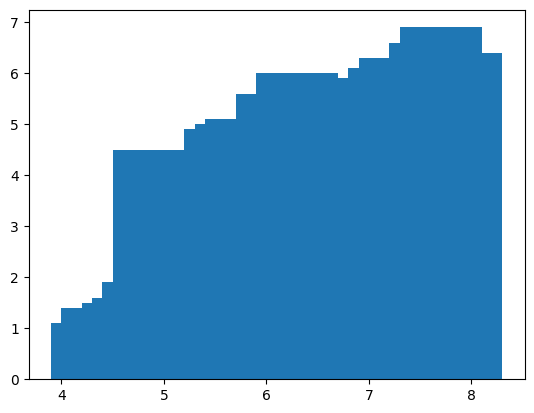

In [58]:
plt.bar(by_group.index, by_group.values)
plt.show()

In [60]:
import matplotlib.pyplot as plt

In [52]:
plt

<module 'matplotlib' from '/usr/local/python/3.12.1/lib/python3.12/site-packages/matplotlib/__init__.py'>

---

### End of lesson routine